<a href="https://colab.research.google.com/github/ZioGuillo/python_codes/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [5]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [7]:
#Get the stock quote 
today = datetime.today().strftime('%Y-%m-%d')
df = web.DataReader('AAPL', data_source='yahoo', start='2017-01-01', end=today) 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.277639
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.247108
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.385668
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.690971
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.944603
...,...,...,...,...,...,...
2020-11-05,119.620003,116.870003,117.949997,119.029999,126387100.0,118.824997
2020-11-06,119.199997,116.129997,118.320000,118.690002,114457900.0,118.690002
2020-11-09,121.989998,116.050003,120.500000,116.320000,154515300.0,116.320000


In [8]:
df.shape

(973, 6)

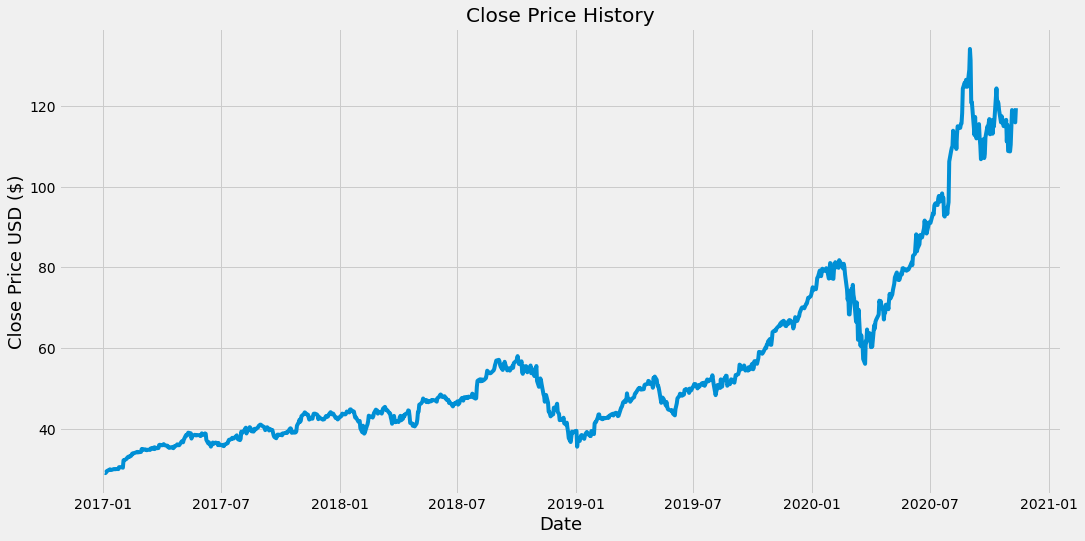

In [9]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [11]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [12]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [13]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [14]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [16]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [17]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

719/719 [==============================] - 16s 23ms/step - loss: 0.0011


In [19]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [20]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [21]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [22]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [23]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

10.687585852503537

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


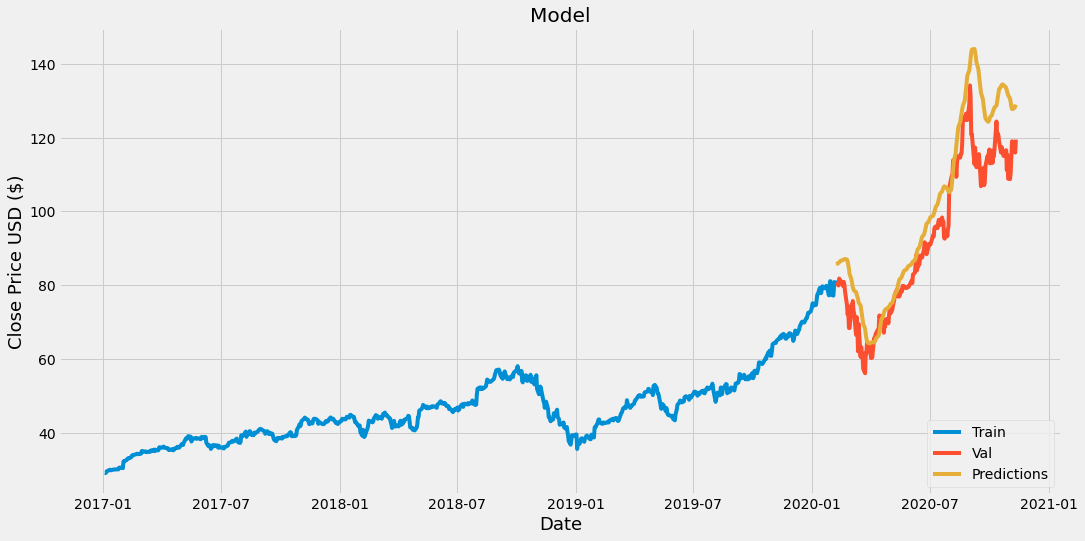

In [24]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [25]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-02-07,80.007500,85.729385
2020-02-10,80.387497,85.873650
2020-02-11,79.902496,86.028709
2020-02-12,81.800003,86.146553
2020-02-13,81.217499,86.366150
...,...,...
2020-11-05,119.029999,127.792236
2020-11-06,118.690002,127.759560
2020-11-09,116.320000,128.111526


In [26]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=today)
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[129.6221]]


In [27]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end=today)
print(apple_quote2['Close'])

Date
2019-12-18     69.934998
2019-12-19     70.004997
2019-12-20     69.860001
2019-12-23     71.000000
2019-12-24     71.067497
                 ...    
2020-11-05    119.029999
2020-11-06    118.690002
2020-11-09    116.320000
2020-11-10    115.970001
2020-11-11    119.489998
Name: Close, Length: 228, dtype: float64
